In [1]:
# Import libraries to be used
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)  
2 sex - student's sex (binary: "F" - female or "M" - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: "U" - urban or "R" - rural)  
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)  
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")  
12 guardian - student's guardian (nominal: "mother", "father" or "other")  
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)    
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)  

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)  

Additional note: there are several (382) students that belong to both datasets .   
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


### Data Analysis

In [2]:
# Importing the dataset
data_maths = pd.read_csv("student-mat.csv", delimiter=";")
pd.set_option('max_columns', None)
data_maths.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [3]:
data_maths.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
drop= ["school", "sex" , "age" , "address" , "famsize"]
data_maths.drop(drop, axis= 1, inplace= True)

In [5]:
# yes = 1 & no= 0
toMapfeatres= ['schoolsup' , 'famsup', 'paid' , 'activities', 'nursery', 'higher' , 'internet', 'romantic']
for i in range(len(toMapfeatres)):
    data_maths[toMapfeatres[i]]= data_maths[toMapfeatres[i]].map({'yes': 1, 'no': 0})
# A=0 & T=1
data_maths['Pstatus']= data_maths['Pstatus'].map({'T': 1, 'A': 0})
data_maths['guardian']= data_maths['guardian'].map({"father":0, "mother":1, "other":2})
data_maths.head(10)

,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,4,4,at_home,teacher,course,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,1,at_home,other,course,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,1,at_home,other,other,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,4,2,health,services,home,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,3,3,other,other,home,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
5,1,4,3,services,other,reputation,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15,15
6,1,2,2,other,other,home,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,12,12,11
7,0,4,4,other,teacher,home,1,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,6,5,6
8,0,3,2,services,other,home,1,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,16,18,19
9,1,3,4,other,other,home,1,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,14,15,15


In [6]:
# Finding the correlation between the data values
corr= data_maths.corr()
corr

,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Pstatus,1.000000,-0.123565,-0.088730,-0.108715,0.028265,0.024294,-0.003339,-0.042238,0.019067,0.046435,0.097352,-0.090615,-0.040735,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.123565,1.000000,0.623455,-0.023918,-0.171639,0.064944,-0.236680,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.088730,0.623455,1.000000,-0.133644,-0.158194,-0.009175,-0.250408,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
guardian,-0.108715,-0.023918,-0.133644,1.000000,-0.000069,0.011584,0.180494,-0.063545,-0.004516,0.043390,-0.023488,-0.080645,-0.020179,-0.059394,0.093945,0.040979,0.045716,0.056557,-0.005847,-0.040810,-0.067497,0.163752,-0.041727,-0.087495,-0.070109
traveltime,0.028265,-0.171639,-0.158194,-0.000069,1.000000,-0.100909,0.092239,-0.009246,-0.003286,-0.066420,-0.007766,-0.033338,-0.083508,-0.111302,0.021962,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,0.024294,0.064944,-0.009175,0.011584,-0.100909,1.000000,-0.173563,0.037763,0.145228,0.167220,0.089877,0.081325,0.175081,0.059422,0.053285,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,-0.003339,-0.236680,-0.250408,0.180494,0.092239,-0.173563,1.000000,-0.000437,-0.055075,-0.188039,-0.069341,-0.100734,-0.300316,-0.063451,0.093137,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
schoolsup,-0.042238,-0.036029,0.037530,-0.063545,-0.009246,0.037763,-0.000437,1.000000,0.104681,-0.020753,0.046032,0.045967,0.054486,-0.009683,-0.080716,-0.001345,-0.045465,-0.037698,-0.021485,-0.087152,-0.034124,0.022526,-0.212607,-0.117385,-0.082788
famsup,0.019067,0.183727,0.185496,-0.004516,-0.003286,0.145228,-0.055075,0.104681,1.000000,0.293184,-0.001500,0.059536,0.100815,0.103581,0.012440,-0.020436,0.010538,-0.015631,-0.031575,-0.086688,0.029297,0.024353,-0.084569,-0.059166,-0.039157
paid,0.046435,0.159700,0.086981,0.043390,-0.066420,0.167220,-0.188039,-0.020753,0.293184,1.000000,-0.021382,0.102143,0.189214,0.153132,0.005536,0.000460,-0.064253,0.010493,0.062465,0.060454,-0.078132,0.007435,0.039079,0.105198,0.101996


### Data Visualisation

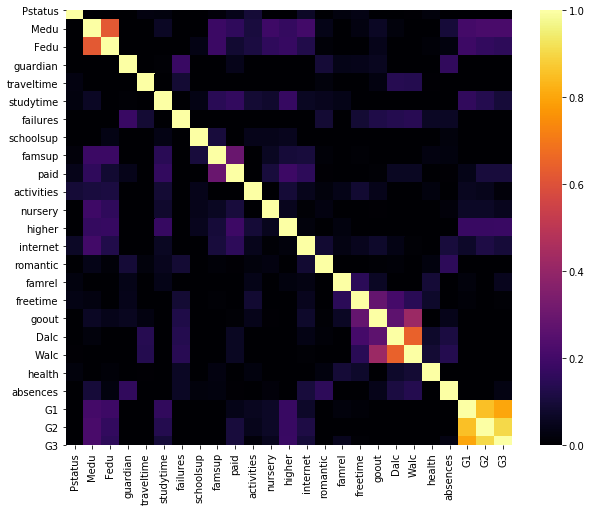

In [7]:
# Plotting the heatmap to visualise the correlation between diffrent data values
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap= "inferno", vmin=0, vmax=1)

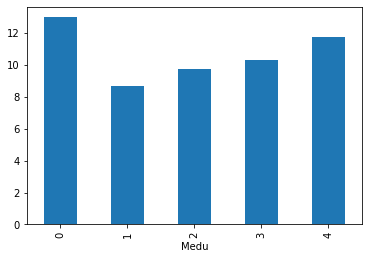

In [8]:
# Plotting the bar graph between Pstatus and  G3
X= ['Pstatus', 'Medu' , 'Fedu' , 'Mjob' , 'Fjob' , 'reason' , 'guardian', 'traveltime' , 'studytime' , 'failures' , 'schoolsup' , 'famsup', 'paid' , 'activities', 'nursery', 'higher' , 'internet', 'romantic', 'famrel' ,'freetime', 'goout', 'Dalc' , 'Walc', 'health' , 'absences']
df=data_maths.groupby([X[1]]).mean()["G3"]
df.plot.bar()

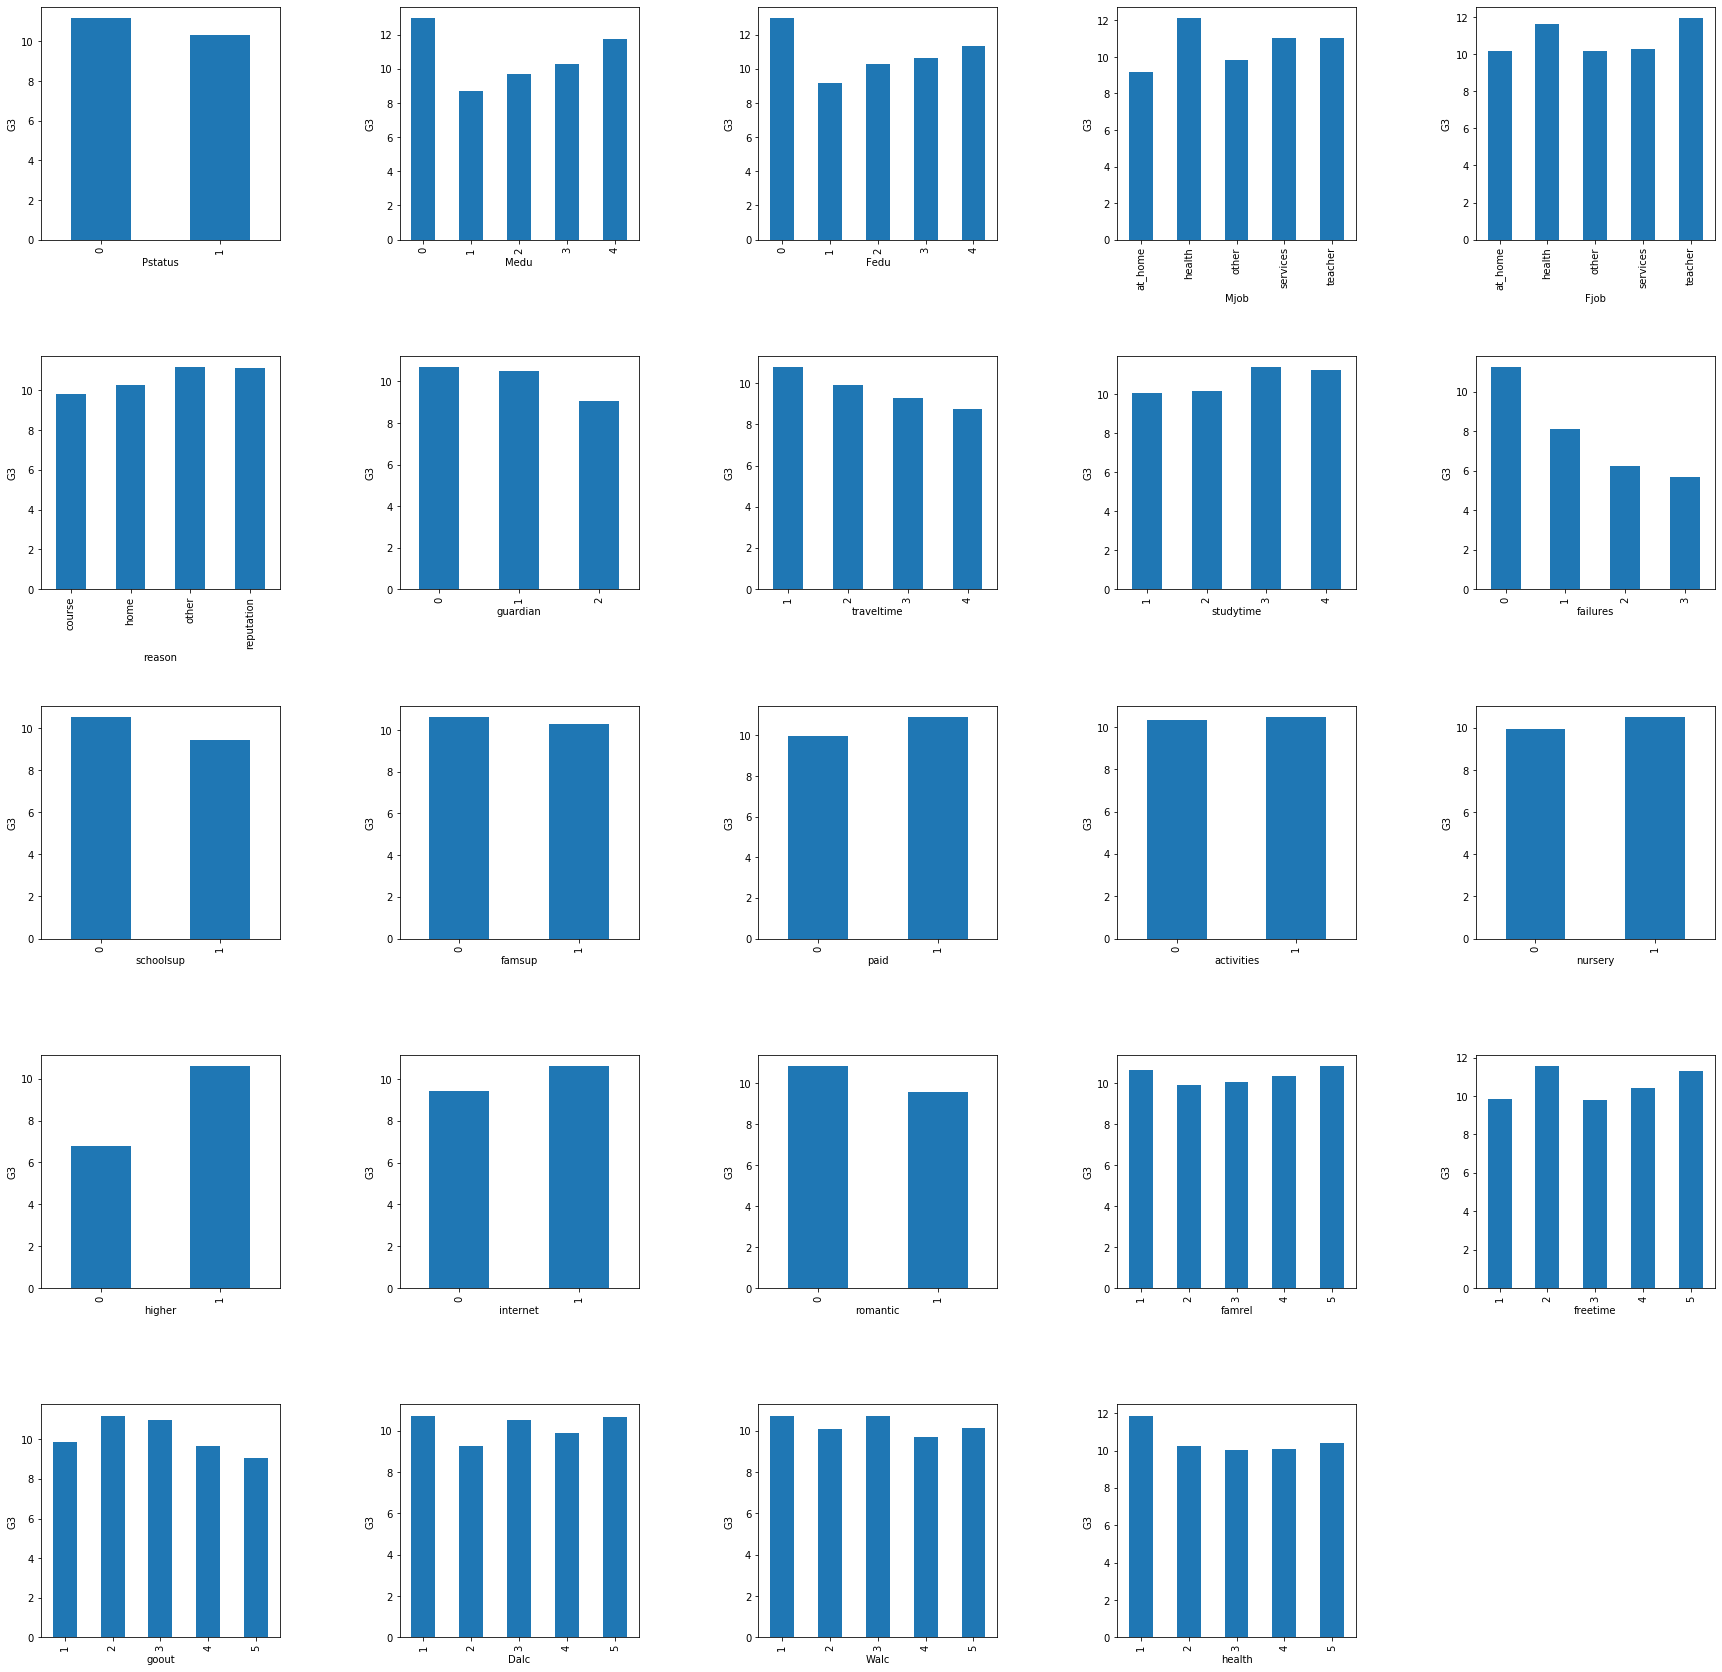

In [9]:
# Plotting the bar graph between diffrent features and  G3
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1,25):
    ax = fig.add_subplot(5, 5, i)
    df=data_maths.groupby([X[i-1]]).mean()["G3"]
    df.plot.bar(ax=ax)
    plt.xlabel(X[i-1])
    plt.ylabel("G3")

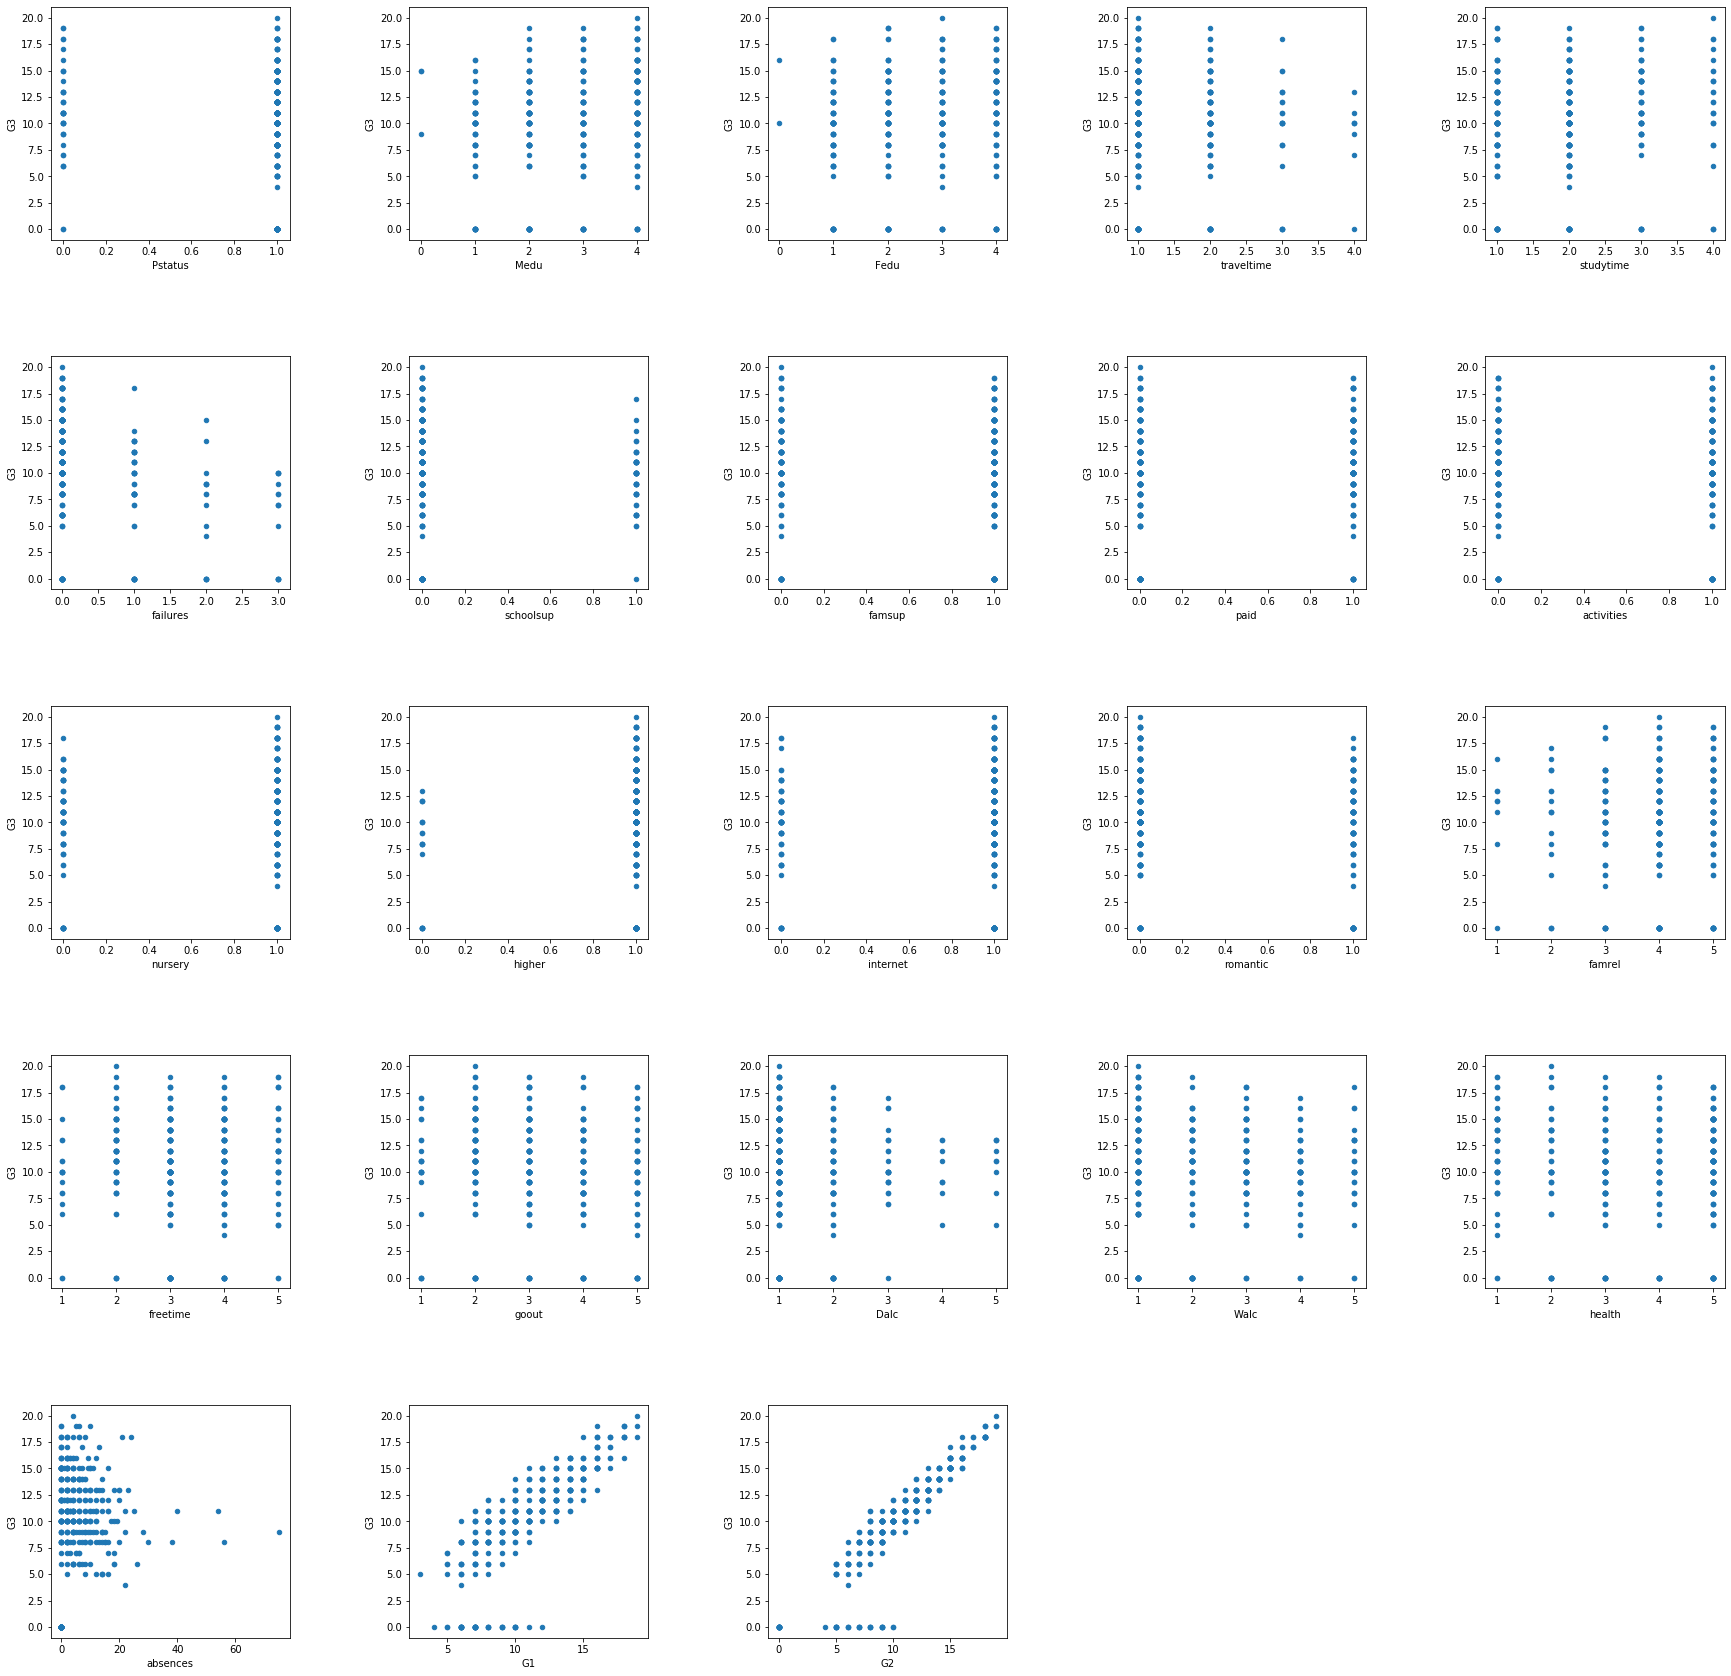

In [10]:
# Plotting the scatter plot between diffrent features and  G3
scatterFeatures= ['Pstatus', 'Medu' , 'Fedu' , 'traveltime' , 'studytime' , 'failures' , 'schoolsup' , 'famsup', 'paid' , 'activities', 'nursery', 'higher' , 'internet', 'romantic', 'famrel' ,'freetime', 'goout', 'Dalc' , 'Walc', 'health' , 'absences', 'G1' , 'G2']
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1,24):
    ax = fig.add_subplot(5, 5, i)
    data_maths.plot.scatter(x= scatterFeatures[i-1], y="G3", ax=ax)
    plt.xlabel(scatterFeatures[i-1])
    plt.ylabel("G3")

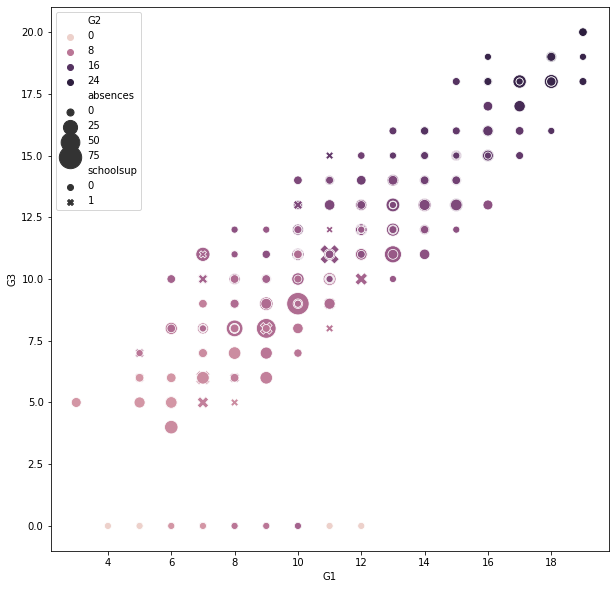

In [11]:
## Plotting an overall scatter plot between diffrent features and  G3 to visualise the liniarity between data points
plt.figure(figsize=(10,10))
sns.scatterplot(x= "G1", y="G3", hue="G2", style="schoolsup", size="absences",sizes=(50, 500), data= data_maths)

### Model development and Evaluation

In [12]:
features= [ 'traveltime' , 'studytime' , 'failures' , 'higher' , 'internet', 'romantic','Dalc' , 'absences','G1' , 'G2']
X= data_maths[features]
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
y= data_maths["G3"]
standardized_X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 0.06741357 -0.03295513 -0.20174401  0.10590377 -0.07927225 -0.17385254
 -0.01121913  0.40896104  0.29808839  3.79048764]


In [14]:
y_pred= regr.predict(X_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_pred - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 5.39
Variance score: 0.80
